In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# Найти и загрузить датасет, подгодящий для регрессии

# Датасет о качестве воздуха. Ссылка на датасет: https://archive.ics.uci.edu/ml/datasets/Air+Quality
# Описание стобцов взято с сайта
|Date|Time|CO(GT)|PT08.S1(CO)|NMHC(GT)|C6H6(GT)|PT08.S2(NMHC)|NOx(GT)|PT08.S3(NOx)|NO2(GT)|PT08.S4(NO2)|PT08.S5(O3)|T|RH|AH|
|----|-----|----------------------------------------------|-------------------------------------------|--------------------------------------------------------------------------|-----------------------------------------|-------------------------------------------|------------------------------|-------------------------------------------|------------------------------------------------------|-------------------------------------------|-----------------------------------------|------------|-----------------------|-------------------|
|Дата|Время|Средняя концентрация CO в mg/m^3 воздуха в час|Среднее количество PT08.S1 в час от датчика|Средняя концентрация не металического гидрокарбона в microg/m^3 воздуха|Средняя концентрация бензола в microg/m^3|Среднее количество PT08.S2 в час от датчика|Средняя концентрация NOx в час|Среднее количество PT08.S3 в час от датчика|Средняя концентрация NO2 в час в microg/m^3 воздуха|Среднее количество PT08.S4 в час от датчика|Среднее количество PT08.S5 в час от датчика|Температура|Относительная влажность|Абсолютная влажность|

In [3]:
column_names = 'Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH'
dataset = pd.read_csv('AirQualityUCI.csv', delimiter = ';')

# Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).
# Столбцы дата и время не вещественные. Поэтому эти 2 столбца уберем, а остальные оставим.

In [45]:
dataset_real = dataset.iloc[:, 2:]
dataset_real.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


# Визуализировать heatmap-матрицу кореллированности признаков

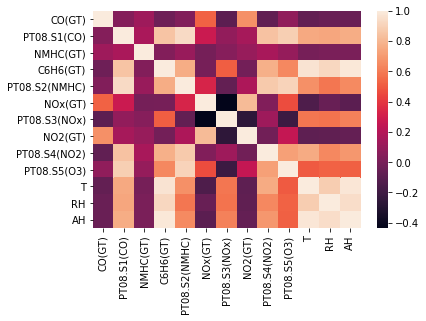

In [47]:
corr = dataset_real.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Визуализировать взаимосвязь между target-переменной и каждым из признаком (с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной

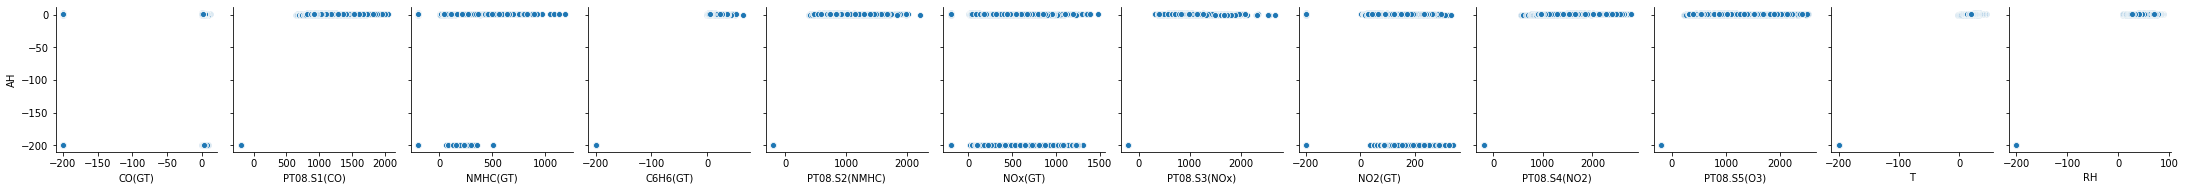

In [193]:
y = dataset_real.AH
X = dataset_real.drop('AH', axis = 1)
sns.pairplot(data = dataset_real, y_vars = ['AH'], x_vars = X.columns)

# Разделить на обучающую и тестовую выборки

In [194]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

# Опробовать линейную регрессию

# Обучить модель линейной регрессии (LinearRegression)

In [70]:
model_linear = sklearn.linear_model.LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#  Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе
# Значения метрик MAE для тестового набора немного ниже, чем для обучаещего. MSE ниже для тестового набора, чем для обучающего. R2 практически одинаковы для двух наборов.

In [77]:
print('MAE for train set {}'.format(sklearn.metrics.mean_absolute_error(y_train, model_linear.predict(X_train))))
print('MSE for train set {}'.format(sklearn.metrics.mean_squared_error(y_train, model_linear.predict(X_train))))
print('R2 for train set {}'.format(sklearn.metrics.r2_score(y_train, model_linear.predict(X_train))))
print('MAE for test set {}'.format(sklearn.metrics.mean_absolute_error(y_test, model_linear.predict(X_test))))
print('MSE for test set {}'.format(sklearn.metrics.mean_squared_error(y_test, model_linear.predict(X_test))))
print('R2 for test set {}'.format(sklearn.metrics.r2_score(y_test, model_linear.predict(X_test))))

MAE for train set 0.7527631802641589
MSE for train set 1.0513300830139776
R2 for train set 0.9992941357434272
MAE for test set 0.7309995399722868
MSE for test set 0.9290321412699565
R2 for test set 0.9994286402527692


# Вывести model.coef_ и model.intercept_

In [79]:
model_linear.coef_

array([-1.84396975e-04, -6.46431192e-04,  1.85844454e-03,  7.71493706e-01,
       -1.77265412e-02, -3.34612531e-03, -1.06290198e-03,  5.56183267e-03,
       -4.98577120e-03,  7.54355841e-04,  2.26555580e-01,  7.43505115e-02])

In [80]:
model_linear.intercept_

10.688281661887167

# Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же как мы строили графики для feature_importance в теме с деревьями) (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси

[Text(0, 0, 'CO(GT)'),
 Text(0, 0, 'PT08.S1(CO)'),
 Text(0, 0, 'NMHC(GT)'),
 Text(0, 0, 'C6H6(GT)'),
 Text(0, 0, 'PT08.S2(NMHC)'),
 Text(0, 0, 'NOx(GT)'),
 Text(0, 0, 'PT08.S3(NOx)'),
 Text(0, 0, 'NO2(GT)'),
 Text(0, 0, 'PT08.S4(NO2)'),
 Text(0, 0, 'PT08.S5(O3)'),
 Text(0, 0, 'T'),
 Text(0, 0, 'RH')]

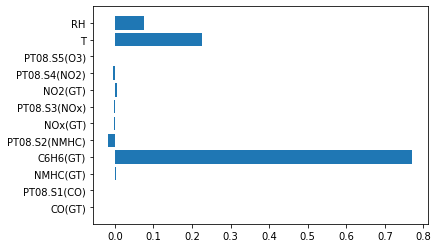

In [98]:
fig, ax = plt.subplots()
ax.barh(range(len(model_linear.coef_)), model_linear.coef_)
ax.set_yticks(range(len(model_linear.coef_)))
ax.set_yticklabels(dataset_real.columns)

# Опробовать регрессию Lasso
# Обучить модель регрессии (Lasso), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [179]:
model_lasso = Lasso()
parameters = {'alpha': np.linspace(0,1,100)}
lasso_grid = GridSearchCV(model_lasso ,parameters)
lasso_grid.fit(X_train, y_train)
model_lasso = lasso_grid.best_estimator_

/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2423.792525188771, tolerance: 807.0360889766273
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_pa

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130.3510074573126, tolerance: 788.402003259601
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1032.2896025215282, tolerance: 769.7560354645595
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1050.1486720791163, tolerance: 807.0360889766273
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

# Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе
# Для MAE на тестовом наборе значение немного меньше. Для MSE на обучающем наборе значение меньше. Для R2 значения почти одинаковые

In [108]:
print('MAE for train set {}'.format(sklearn.metrics.mean_absolute_error(y_train, model_lasso.predict(X_train))))
print('MSE for train set {}'.format(sklearn.metrics.mean_squared_error(y_train, model_lasso.predict(X_train))))
print('R2 for train set {}'.format(sklearn.metrics.r2_score(y_train, model_lasso.predict(X_train))))
print('MAE for test set {}'.format(sklearn.metrics.mean_absolute_error(y_test, model_lasso.predict(X_test))))
print('MSE for test set {}'.format(sklearn.metrics.mean_squared_error(y_test, model_lasso.predict(X_test))))
print('R2 for test set {}'.format(sklearn.metrics.r2_score(y_test, model_lasso.predict(X_test))))

MAE for train set 0.752519649921271
MSE for train set 1.0513392311344416
R2 for train set 0.9992941296013683
MAE for test set 0.7308245340423623
MSE for test set 0.9289186520034903
R2 for test set 0.9994287100492765


# Для наилучшей модели вывести model.coef_ и model.intercept_

In [109]:
model_lasso.coef_

array([-1.82548076e-04, -6.58522423e-04,  1.85613687e-03,  7.72775709e-01,
       -1.77844598e-02, -3.34243289e-03, -1.07793406e-03,  5.55558428e-03,
       -4.96527967e-03,  7.55709000e-04,  2.25908982e-01,  7.40886043e-02])

In [110]:
model_lasso.intercept_

10.748585809567562

# Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

[Text(0, 0, 'CO(GT)'),
 Text(0, 0, 'PT08.S1(CO)'),
 Text(0, 0, 'NMHC(GT)'),
 Text(0, 0, 'C6H6(GT)'),
 Text(0, 0, 'PT08.S2(NMHC)'),
 Text(0, 0, 'NOx(GT)'),
 Text(0, 0, 'PT08.S3(NOx)'),
 Text(0, 0, 'NO2(GT)'),
 Text(0, 0, 'PT08.S4(NO2)'),
 Text(0, 0, 'PT08.S5(O3)'),
 Text(0, 0, 'T'),
 Text(0, 0, 'RH')]

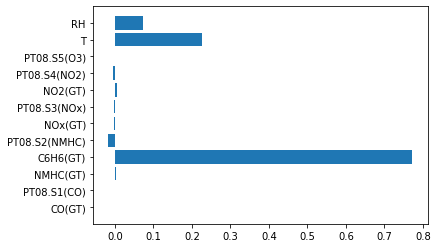

In [111]:
fig, ax = plt.subplots()
ax.barh(range(len(model_lasso.coef_)), model_lasso.coef_)
ax.set_yticks(range(len(model_lasso.coef_)))
ax.set_yticklabels(dataset_real.columns)

# Опробовать регрессию Ridge
# Обучить модель регрессии (Ridge), с помощью GridSearchCV найти наилучший параметр alpha, дальше работаем с лучше моделью

In [114]:
model_ridge = Ridge()
parameters = {'alpha': np.linspace(0,1,100)}
ridge_grid = GridSearchCV(model_ridge ,parameters)
ridge_grid.fit(X_train, y_train)
model_ridge = ridge_grid.best_estimator_

# Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [115]:
print('MAE for train set {}'.format(sklearn.metrics.mean_absolute_error(y_train, model_ridge.predict(X_train))))
print('MSE for train set {}'.format(sklearn.metrics.mean_squared_error(y_train, model_ridge.predict(X_train))))
print('R2 for train set {}'.format(sklearn.metrics.r2_score(y_train, model_ridge.predict(X_train))))
print('MAE for test set {}'.format(sklearn.metrics.mean_absolute_error(y_test, model_ridge.predict(X_test))))
print('MSE for test set {}'.format(sklearn.metrics.mean_squared_error(y_test, model_ridge.predict(X_test))))
print('R2 for test set {}'.format(sklearn.metrics.r2_score(y_test, model_ridge.predict(X_test))))

MAE for train set 0.7527663746011338
MSE for train set 1.051330084833651
R2 for train set 0.9992941357422055
MAE for test set 0.7310021565864208
MSE for test set 0.9290339412352949
R2 for test set 0.9994286391457808


# Для наилучшей модели вывести model.coef_ и model.intercept_

In [116]:
model_ridge.coef_

array([-1.84414676e-04, -6.46312908e-04,  1.85846594e-03,  7.71475412e-01,
       -1.77256927e-02, -3.34619347e-03, -1.06265138e-03,  5.56194404e-03,
       -4.98604534e-03,  7.54367183e-04,  2.26564511e-01,  7.43542604e-02])

In [117]:
model_ridge.intercept_

10.68737655455454

# Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

[Text(0, 0, 'CO(GT)'),
 Text(0, 0, 'PT08.S1(CO)'),
 Text(0, 0, 'NMHC(GT)'),
 Text(0, 0, 'C6H6(GT)'),
 Text(0, 0, 'PT08.S2(NMHC)'),
 Text(0, 0, 'NOx(GT)'),
 Text(0, 0, 'PT08.S3(NOx)'),
 Text(0, 0, 'NO2(GT)'),
 Text(0, 0, 'PT08.S4(NO2)'),
 Text(0, 0, 'PT08.S5(O3)'),
 Text(0, 0, 'T'),
 Text(0, 0, 'RH')]

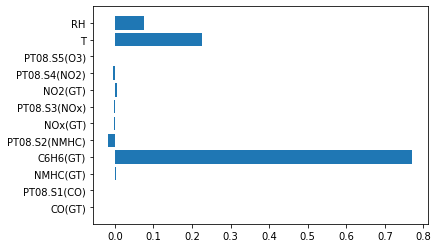

In [118]:
fig, ax = plt.subplots()
ax.barh(range(len(model_ridge.coef_)), model_ridge.coef_)
ax.set_yticks(range(len(model_ridge.coef_)))
ax.set_yticklabels(dataset_real.columns)

# Опробовать регрессию ElasticNet
# Обучить модель регрессии (ElasticNet), с помощью GridSearchCV найти наилучший параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучше моделью

In [122]:
model_elastic = ElasticNet()
parameters = {'alpha': np.linspace(0,1,10), 'l1_ratio': np.linspace(0, 1, 10)}
elastic_grid = GridSearchCV(model_elastic ,parameters)
elastic_grid.fit(X_train, y_train)
model_elastic = elastic_grid.best_estimator_

/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2762.1802638071795, tolerance: 799.6184679493124
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_p

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2589.940585507211, tolerance: 773.5135495201766
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2751.28640358678, tolerance: 758.5622207334

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2763.4891450504756, tolerance: 799.605800535275
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2781.6880995581305, tolerance: 739.85677610

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2781.6880995581305, tolerance: 739.8567761022796
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2762.1802638071795, tolerance: 799.6184679

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2762.1802638071795, tolerance: 799.6184679493124
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2589.940585507211, tolerance: 773.51354952

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1157.6785814146556, tolerance: 739.8567761022796
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189.1613774102868, tolerance: 799.6184679493124
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 939.4890979296983, tolerance: 773.5135495201766
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795.9753269180651, tolerance: 758.5622207334136
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 963.5284246386491, tolerance: 799.605800535275
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752.0744305930843, tolerance: 739.8567761022796
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871.1896970634116, tolerance: 799.605800535275
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3650.047046644162, tolerance: 799.6184679493124
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3482.0657840033145, tolerance: 773.5135495201766
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4136.905673472845, tolerance: 758.5622207334136
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4134.803421881912, tolerance: 799.605800535275
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4148.046913785141, tolerance: 739.8567761022796
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of it

# Для наилучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [123]:
print('MAE for train set {}'.format(sklearn.metrics.mean_absolute_error(y_train, model_elastic.predict(X_train))))
print('MSE for train set {}'.format(sklearn.metrics.mean_squared_error(y_train, model_elastic.predict(X_train))))
print('R2 for train set {}'.format(sklearn.metrics.r2_score(y_train, model_elastic.predict(X_train))))
print('MAE for test set {}'.format(sklearn.metrics.mean_absolute_error(y_test, model_elastic.predict(X_test))))
print('MSE for test set {}'.format(sklearn.metrics.mean_squared_error(y_test, model_elastic.predict(X_test))))
print('R2 for test set {}'.format(sklearn.metrics.r2_score(y_test, model_elastic.predict(X_test))))

MAE for train set 0.752519649921271
MSE for train set 1.0513392311344416
R2 for train set 0.9992941296013683
MAE for test set 0.7308245340423623
MSE for test set 0.9289186520034903
R2 for test set 0.9994287100492765


# Для наилучшей модели вывести model.coef_ и model.intercept_

In [124]:
model_elastic.coef_

array([-1.82548076e-04, -6.58522423e-04,  1.85613687e-03,  7.72775709e-01,
       -1.77844598e-02, -3.34243289e-03, -1.07793406e-03,  5.55558428e-03,
       -4.96527967e-03,  7.55709000e-04,  2.25908982e-01,  7.40886043e-02])

In [125]:
model_elastic.intercept_

10.748585809567562

# Для наилучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

[Text(0, 0, 'CO(GT)'),
 Text(0, 0, 'PT08.S1(CO)'),
 Text(0, 0, 'NMHC(GT)'),
 Text(0, 0, 'C6H6(GT)'),
 Text(0, 0, 'PT08.S2(NMHC)'),
 Text(0, 0, 'NOx(GT)'),
 Text(0, 0, 'PT08.S3(NOx)'),
 Text(0, 0, 'NO2(GT)'),
 Text(0, 0, 'PT08.S4(NO2)'),
 Text(0, 0, 'PT08.S5(O3)'),
 Text(0, 0, 'T'),
 Text(0, 0, 'RH')]

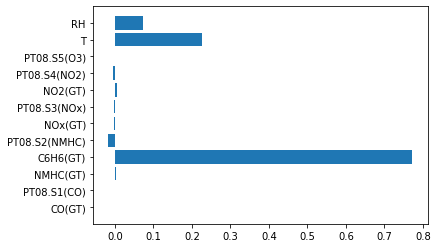

In [126]:
fig, ax = plt.subplots()
ax.barh(range(len(model_elastic.coef_)), model_elastic.coef_)
ax.set_yticks(range(len(model_elastic.coef_)))
ax.set_yticklabels(dataset_real.columns)

# Выбрать наилучшую модель, написать её ошибку MAE, MSE и R2 на тестовом наборе
# Будем искать модель, у которой MSE меньше всего для тестового набора

In [168]:
models_mse = {'linear': sklearn.metrics.mean_squared_error(y_test, model_linear.predict(X_test)),
         'lasso': sklearn.metrics.mean_squared_error(y_test, model_lasso.predict(X_test)),
         'ridge': sklearn.metrics.mean_squared_error(y_test, model_ridge.predict(X_test)),
         'elastic': sklearn.metrics.mean_squared_error(y_test, model_elastic.predict(X_test))}
value = ['linear', models_mse['linear']]
for i in models_mse.items():
    if i[1] < value[1]:
        value = i
print("The best model: {} MSE {}".format(value[0], value[1]))

The best model: lasso MSE 0.9289186520034903


# Возвращаем категориальные / бинарные признаки на место в датасет, категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True ).

In [169]:
dataset = pd.get_dummies(dataset, drop_first = True)

# Смотрим насколько изменились метрики MAE и MSE на тестовом наборе, отображаем их

In [195]:
y_full = dataset.AH
X_full = dataset.drop('AH', axis = 1)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.3)

In [175]:
model_lasso_full = Lasso()
parameters = {'alpha': np.linspace(0,1,10)}
lasso_grid_full = GridSearchCV(model_lasso_full ,parameters)
lasso_grid_full.fit(X_train_full, y_train_full)
model_lasso_full = lasso_grid_full.best_estimator_

/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1023.7019092903896, tolerance: 810.7191117550241
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_p

In [196]:
print('MAE for test set {}'.format(sklearn.metrics.mean_absolute_error(y_test_full, model_lasso_full.predict(X_test_full))))
print('MSE for test set {}'.format(sklearn.metrics.mean_squared_error(y_test_full, model_lasso_full.predict(X_test_full))))
print('Difference MAE for test set {}'.format(sklearn.metrics.mean_absolute_error(y_test, model_lasso.predict(X_test)) - sklearn.metrics.mean_absolute_error(y_test_full, model_lasso_full.predict(X_test_full))))
print('Difference MSE for test set {}'.format(sklearn.metrics.mean_squared_error(y_test, model_lasso.predict(X_test)) - sklearn.metrics.mean_squared_error(y_test_full, model_lasso_full.predict(X_test_full))))

MAE for test set 0.44033288118377384
MSE for test set 0.3566433769517699
Difference MAE for test set 0.2930235657560472
Difference MSE for test set 0.6245284535434352


# Прогоняем наш датасет (X), который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель новыми данными, пишем получивнуюся ошибку MAE, MSE и R2 на тестовом наборе

In [201]:
scaler = StandardScaler()
y_full_norm = dataset.AH
X_full_norm = dataset.drop('AH', axis = 1)
X_full_norm = scaler.fit_transform(X_full_norm)
X_train_full_norm, X_test_full_norm, y_train_full_norm, y_test_full_norm = train_test_split(X_full_norm, y_full_norm, test_size=0.3)

In [202]:
model_lasso_full_norm = Lasso()
parameters = {'alpha': np.linspace(0,1,10)}
lasso_grid_full_norm = GridSearchCV(model_lasso_full_norm ,parameters)
lasso_grid_full_norm.fit(X_train_full_norm, y_train_full_norm)
model_lasso_full_norm = lasso_grid_full_norm.best_estimator_

/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1039.1194929764417, tolerance: 751.0935608774929
  positive)
/home/sergei/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_p

In [204]:
print('MAE for test set {}'.format(sklearn.metrics.mean_absolute_error(y_test_full_norm, model_lasso_full_norm.predict(X_test_full_norm))))
print('MSE for test set {}'.format(sklearn.metrics.mean_squared_error(y_test_full_norm, model_lasso_full_norm.predict(X_test_full_norm))))
print('R2 for test set {}'.format(sklearn.metrics.r2_score(y_test_full_norm, model_lasso_full_norm.predict(X_test_full_norm))))

MAE for test set 0.459805083392904
MSE for test set 0.4163864607756123
R2 for test set 0.9997459889848149


# Выводим итоговый набор графика с коэффициентами, (желательно если сверху вниз будут идти коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси).

[Text(0, 0, 'CO(GT)'),
 Text(0, 0, 'PT08.S1(CO)'),
 Text(0, 0, 'NMHC(GT)'),
 Text(0, 0, 'C6H6(GT)'),
 Text(0, 0, 'PT08.S2(NMHC)'),
 Text(0, 0, 'NOx(GT)'),
 Text(0, 0, 'PT08.S3(NOx)'),
 Text(0, 0, 'NO2(GT)'),
 Text(0, 0, 'PT08.S4(NO2)'),
 Text(0, 0, 'PT08.S5(O3)'),
 Text(0, 0, 'T'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'AH'),
 Text(0, 0, 'Date_01/02/2005'),
 Text(0, 0, 'Date_01/03/2005'),
 Text(0, 0, 'Date_01/04/2004'),
 Text(0, 0, 'Date_01/04/2005'),
 Text(0, 0, 'Date_01/05/2004'),
 Text(0, 0, 'Date_01/06/2004'),
 Text(0, 0, 'Date_01/07/2004'),
 Text(0, 0, 'Date_01/08/2004'),
 Text(0, 0, 'Date_01/09/2004'),
 Text(0, 0, 'Date_01/10/2004'),
 Text(0, 0, 'Date_01/11/2004'),
 Text(0, 0, 'Date_01/12/2004'),
 Text(0, 0, 'Date_02/01/2005'),
 Text(0, 0, 'Date_02/02/2005'),
 Text(0, 0, 'Date_02/03/2005'),
 Text(0, 0, 'Date_02/04/2004'),
 Text(0, 0, 'Date_02/05/2004'),
 Text(0, 0, 'Date_02/06/2004'),
 Text(0, 0, 'Date_02/07/2004'),
 Text(0, 0, 'Date_02/08/2004'),
 Text(0, 0, 'Date_02/09/2004'),
 Text(0

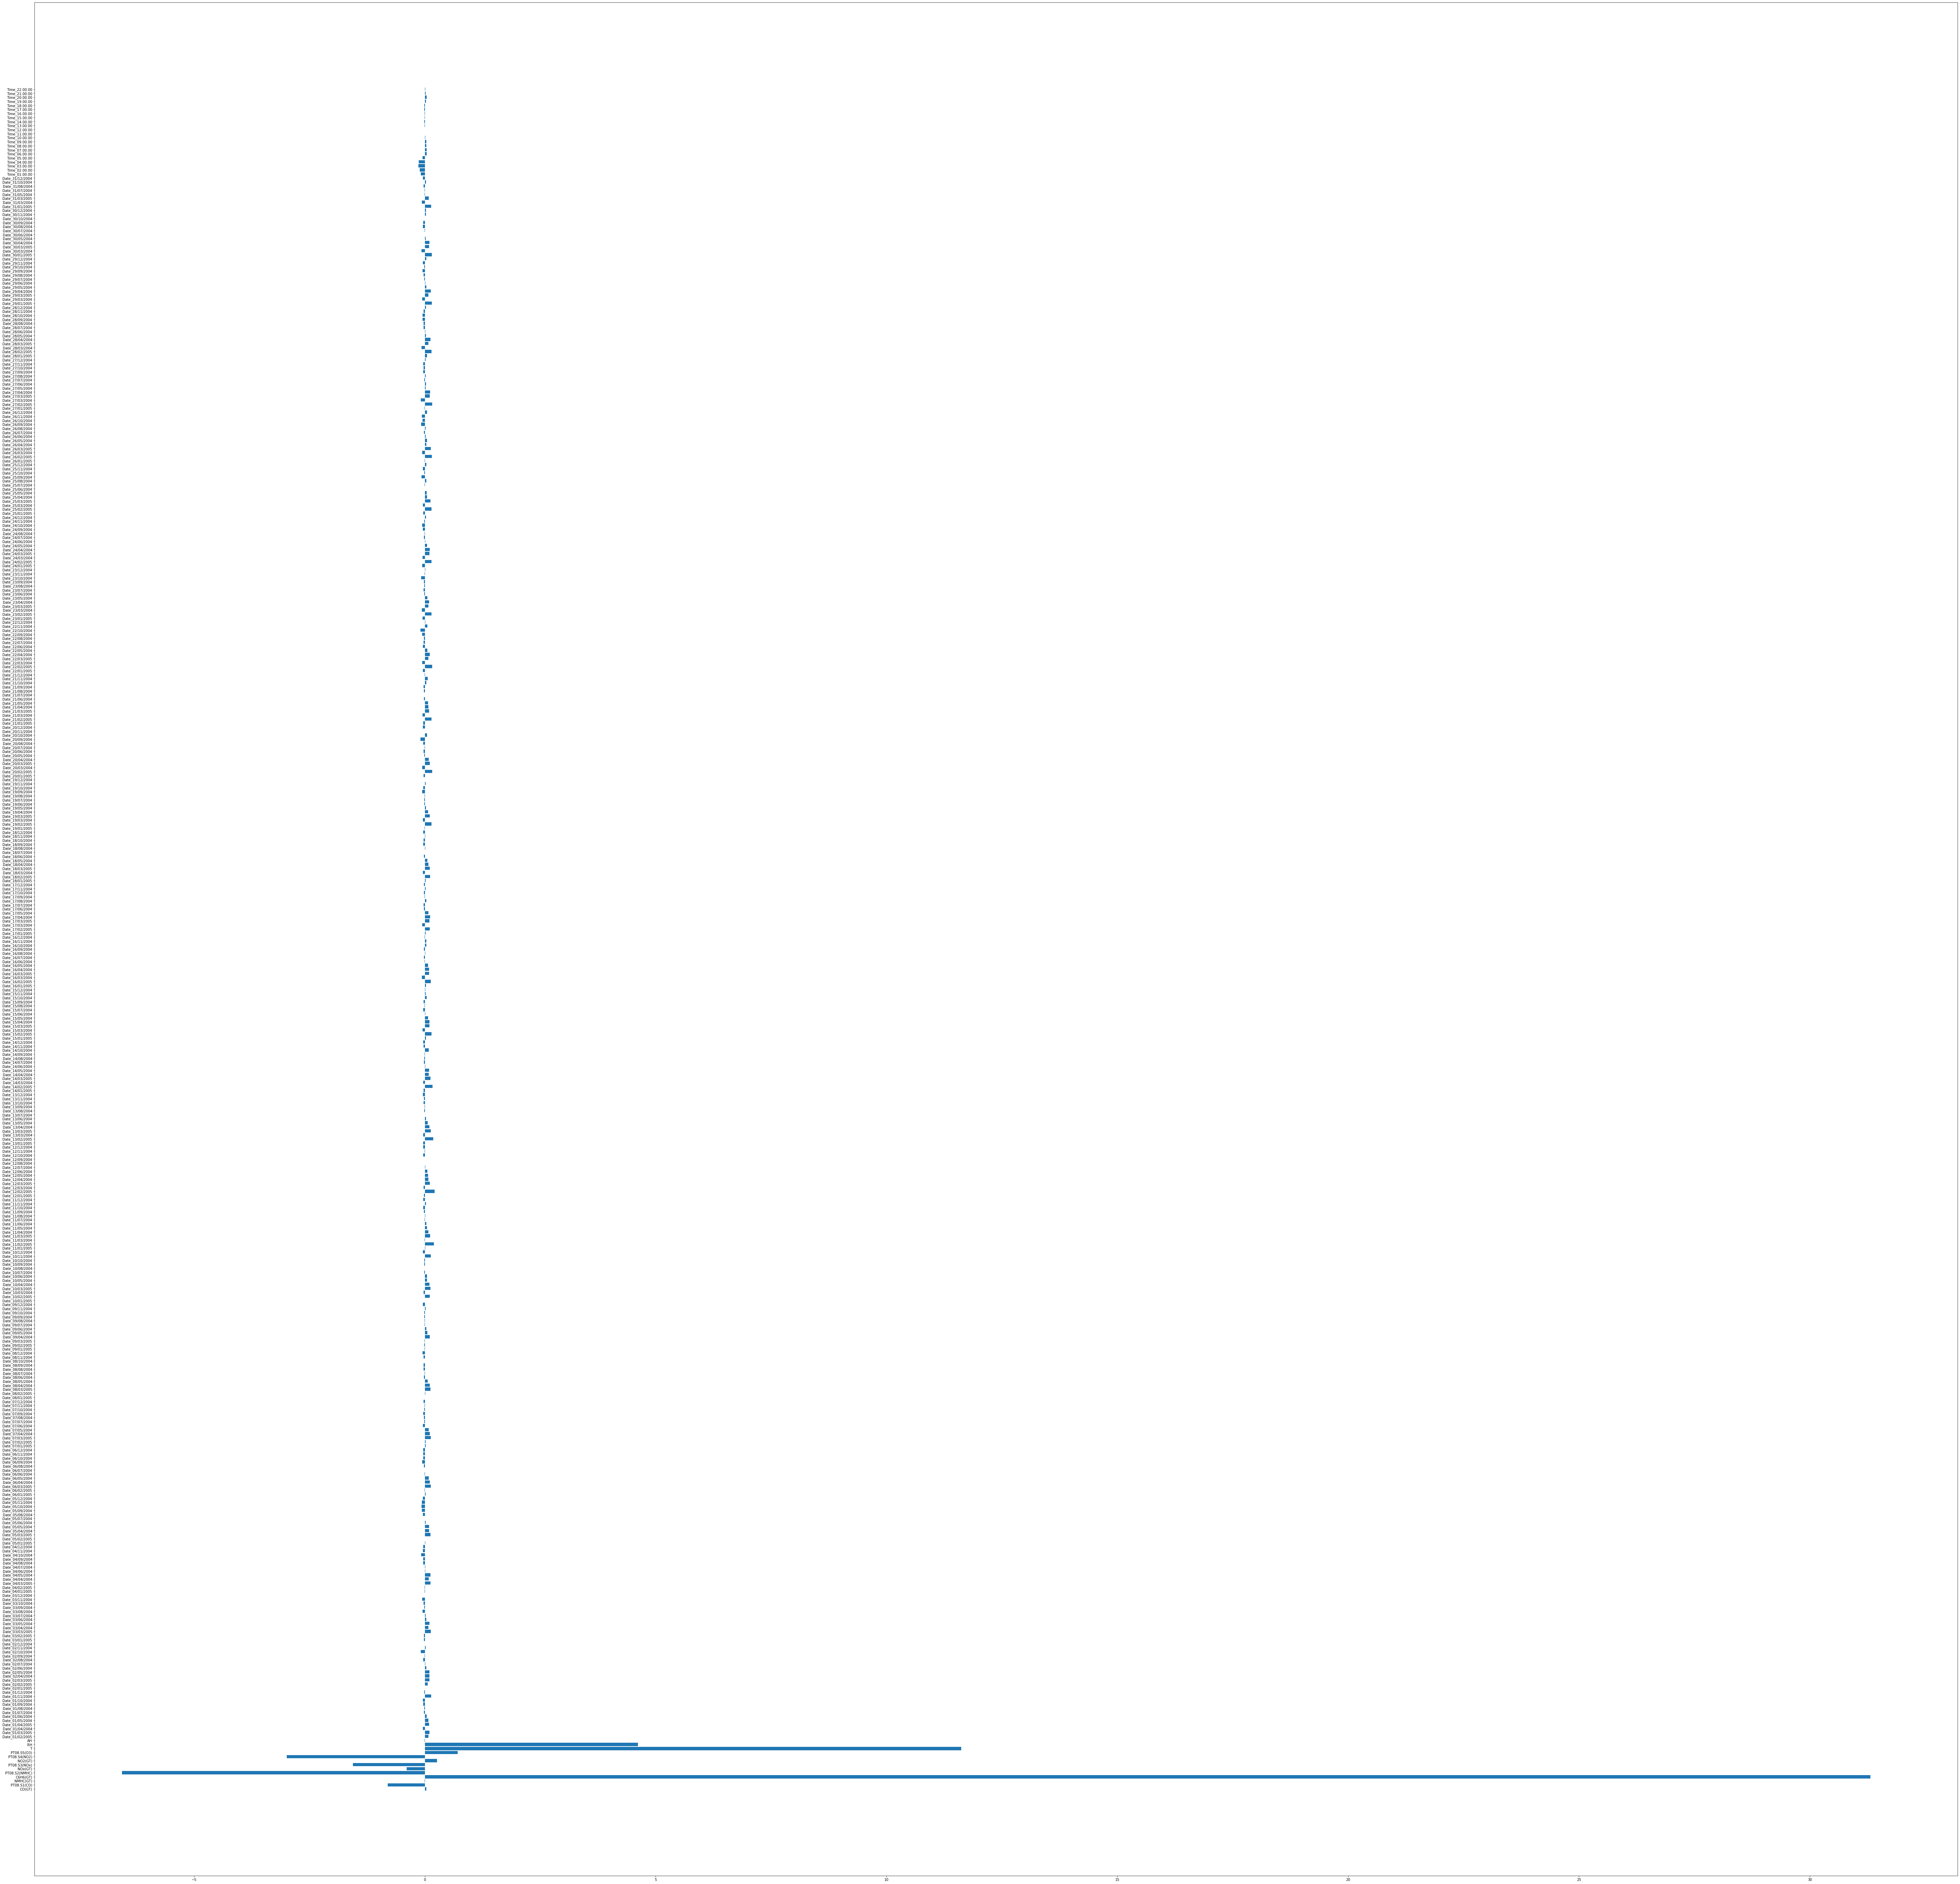

In [217]:
fig, ax = plt.subplots(figsize = (100, 100))
ax.barh(range(len(model_lasso_full_norm.coef_)), model_lasso_full_norm.coef_)
ax.set_yticks(range(len(model_lasso_full_norm.coef_)))
ax.set_yticklabels(dataset.columns)